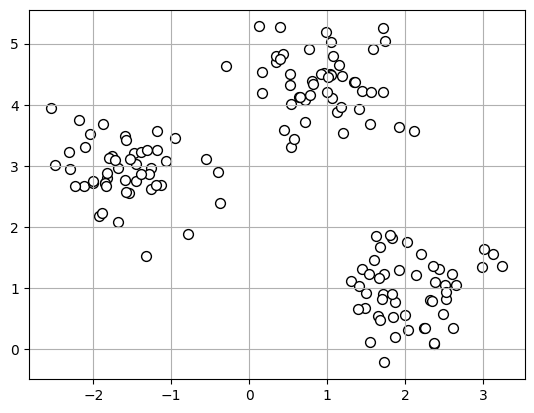

[[ 2.60509732  1.22529553]
 [ 0.5323772   3.31338909]
 [ 0.802314    4.38196181]
 [ 0.5285368   4.49723858]
 [ 2.61858548  0.35769791]
 [ 1.59141542  4.90497725]
 [ 1.74265969  5.03846671]
 [ 2.37533328  0.08918564]
 [-2.12133364  2.66447408]
 [ 1.72039618  5.25173192]
 [ 3.1368855   1.56592763]
 [-0.37494566  2.38787435]
 [-1.84562253  2.71924635]
 [ 0.72144399  4.08475018]
 [ 0.16117091  4.53517846]
 [-1.99912714  2.71285741]
 [-1.47804153  3.2093591 ]
 [ 1.8706766   0.77797407]
 [-1.5933443   2.76898682]
 [ 2.03562611  0.31361691]
 [ 0.64003985  4.12401075]
 [ 2.4411628   1.30941574]
 [ 1.13280393  3.87673946]
 [ 1.04829186  5.03092408]
 [-1.26637157  2.62998828]
 [ 2.31690585  0.81189049]
 [ 2.36230721  1.358767  ]
 [ 1.2091013   3.53566548]
 [-2.54224625  3.95012869]
 [ 1.4815332   0.67875364]
 [-1.59487886  3.48632794]
 [-1.82556205  2.7989214 ]
 [-1.13374003  2.68467271]
 [-1.758702    3.158623  ]
 [ 0.3498724   4.69253251]
 [ 1.68548602  1.66917096]
 [ 2.989047    1.35068599]
 

In [26]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
            X[:,1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)
plt.grid()
plt.show()
print(X)

In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

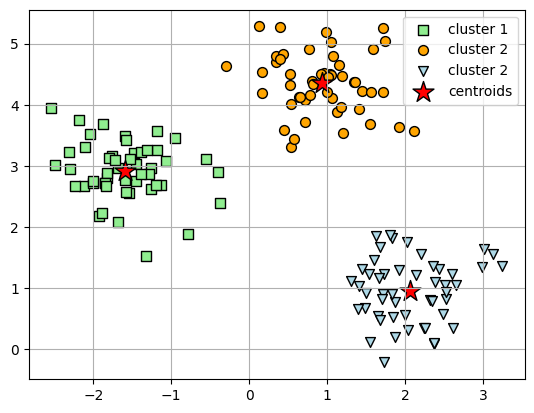

In [28]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

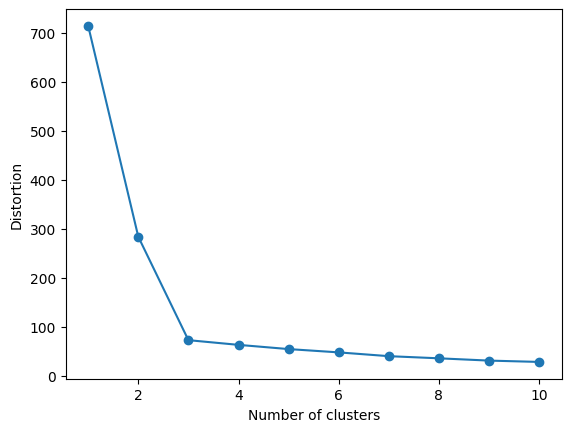

In [29]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [30]:
km = KMeans(n_clusters=3,
            init='k-means++', n_init=10,
            max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,
                                      y_km,
                                      metric='euclidean')
cm

<module 'matplotlib.cm' from 'c:\\Users\\Owner\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\cm.py'>